# Parkville Prject
## Cleaning the dataset

In [88]:
import pandas as pd
import gspread
from oauth2client.service_account import ServiceAccountCredentials

scope = ['https://spreadsheets.google.com/feeds','https://www.googleapis.com/auth/drive']
creds = ServiceAccountCredentials.from_json_keyfile_name('keys.json', scope)
client = gspread.authorize(creds)
sheet = client.open("Parkville Project Top Secret Calendar")
sheet_instance = sheet.get_worksheet(3)
records_data = sheet_instance.get_all_records()
df = pd.DataFrame(records_data)[:28]

# Extracting Dates
import re
for col in df.iloc[:,1:]:
    name = re.findall(r'\w+_\w+_', col)   
    Search = []  
    for values in df[col]:
        match = re.search(r'\((2\d{3})\)|\((\d{1,2}.\d{1,2}.\d{4})\)', values)
        if match is not None:
            Search.append(match.group(0))
        else:
            Search.append(None)
    df[f'{name[0]}Date'] = Search

# Extracting IAAF Points
for col in df.iloc[:,1:23]:
    name = re.findall(r'\w+_\w+_', col)  
    Search = []  
    for values in df[col]:
        match = re.search(r'\((1\d{3})\)|\((\d{3})\)', values)
        if match is not None:
            test = re.search(r'\d+', match.group(0))
            Search.append(test.group(0))
        else:
            Search.append(None)
    df[f'{name[0]}Score'] = Search

# Isolating Times
for col in df.iloc[:,1:23]:
    name = re.findall(r'\w+_\w+_', col)  
    Search = []  
    for values in df[col]:
        match = re.search(r'\d+:\d+:\d+|\d+:\d+.\d+|\d+:\d+', values)
        if match is not None:
            Search.append(match.group(0))
        else:
            Search.append(None)
    df[f'{name[0]}Time'] = Search

# Converting Times to Seconds
for col in df.iloc[:,1:23]:
    row = 0
    for element in df[col]:
        if element is not None:
            # for times less than 1 hour
            if len(element.split(':')) == 2:
                min = float(element.split(':')[0])
                sec = float(element.split(':')[1])
                df[col][row] = min*60 + sec

            # for times greater than 1 hour
            elif len(element.split(':')) == 3:
                hour = float(element.split(':')[0])
                min = float(element.split(':')[1])
                sec = float(element.split(':')[2])
                df[col][row] = hour*60*60 + min*60 + sec
            else:
                print("ERROR invalid time entered")
        row += 1

## The Data

In [90]:
df

,Athlete,800_PB_Time,1500_PB_Time,Mile_PB_Time,3000_PB_Time,5000_PB_Time,10000_PB_Time,5k_PB_Time,10k_PB_Time,15k_PB_Time,...,800_SB_Score,1500_SB_Score,Mile_SB_Score,3000_SB_Score,5000_SB_Score,10k_SB_Score,15k_SB_Score,Half_Mara_SB_Score,Mara_SB_Score,Steeple_SB_Score
0,Lisa Weightman,None,263.9,None,562.6,954.31,1940.14,None,1910.0,3091.0,...,None,None,None,None,None,None,None,921,1193,None
1,Tim Bryant,None,None,None,None,901.37,1872.3,None,None,None,...,None,None,None,None,None,None,None,None,892,None
2,Steve Langdon,113.32,235.0,None,511.0,893.0,None,None,1864.0,None,...,None,None,None,None,None,873,None,None,None,None
3,Jonny Earl,None,None,None,524.71,905.0,1884.0,None,None,None,...,None,None,None,None,None,None,825,819,862,None
4,Max Ueda,None,243.61,None,517.03,898.11,1872.47,None,1834.0,2827.0,...,None,None,None,None,None,None,825,None,None,None
5,Patrick Jaffe,None,None,None,530.45,915.9,1956.0,None,None,None,...,None,None,None,None,None,752,None,None,None,None
6,Jeevaneesh Soundararajah,120.0,240.0,None,522.0,910.0,2005.0,None,1930.0,None,...,None,None,None,None,None,784,None,None,None,None
7,Ben Haseler,None,None,None,552.0,939.0,None,None,1998.0,None,...,None,None,None,None,697,None,None,None,None,None
8,Caleb Muller,115.0,236.0,258.0,517.0,876.0,1814.0,881.0,1882.0,2901.0,...,None,None,None,None,None,None,None,None,None,None
9,Taine Lang,None,262.71,None,567.18,None,None,972.0,2103.0,None,...,None,687,652,606,None,578,None,None,None,None


## Group Analysis

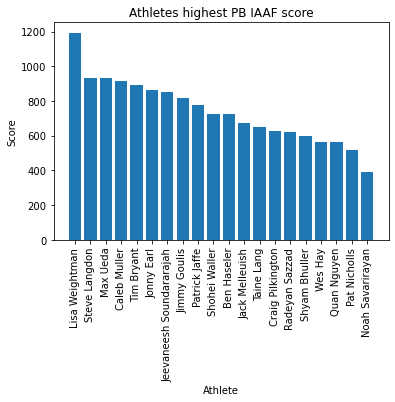

In [131]:
# Finding the best IAAF scores for each person
best_scores = []
for n in df.index:
    personal_scores  = []
    for col in df.iloc[:,45:57]:
        if df[col][n] is not None:
            personal_scores.append(int(df[col][n]))
        else:
             personal_scores.append(0)
    best_scores.append(max(personal_scores))     



df_scores = pd.DataFrame({
    'Athlete': df.Athlete,
    'best_IAAF_score' : best_scores,
              })
df_scores = df_scores.loc[df_scores["best_IAAF_score"] > 0]
df_scores = df_scores.sort_values(by=['best_IAAF_score'], ascending=False)

# Creating the Graphic
import matplotlib.pyplot as plt
x_axis = df_scores['Athlete']
y_axis = df_scores['best_IAAF_score']
plt.bar(x_axis, y_axis)
plt.title('Athletes highest PB IAAF score')
plt.xlabel('Athlete')
plt.ylabel('Score')
plt.xticks(rotation = 90)
plt.show()